In [ ]:
"""
My project worked on the dataset “marketing_data.csv” obtained from the MS AI – Applied Data Science with Python program with Simplilearn.
I received permission to work on this data and to upload the Python code and results to my GitHub account. The goal of this analysis is to 
show my Python coding skills with results using real marketing data. 

"""


In [ ]:
"""
This jupyter notebook analyzes a marketing dataset with data analysis, data cleaning, feature engineering, and testing hypothesis to understand 
customer views.
"""

In [1]:
# Load pandas library
import pandas as pd

# Load the dataset
df = pd.read_csv("marketing_data.csv")
print(df.head())

      ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0            

In [3]:
# Look at data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [5]:
# Look at data structure
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


## Data Cleaning

In [8]:
# Look at the columns names
df_columns = df.columns
print(df_columns)

print("\n")

# Use ".str.strip()" to drop any whitespace from the columns names. 

df.columns = df_columns.str.strip()
print(df.columns)


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='obj

In [10]:
# Drop "$" and commas from the "Income" feature

df["Income"] = df["Income"].replace({r"\$":"", ",": ""}, regex = True).astype(float)

print("Drop $ and commas from the Income feature:\n", df["Income"].head())

print("\n")

df.head()

Drop $ and commas from the Income feature:
 0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
Name: Income, dtype: float64




,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [12]:
# clean the Education labels using replacement 
df["Education"] = df["Education"].replace( {"Graduation":"Graduate", "Basic":"Undergraduate", "2n Cycle":"Master", "PhD":"PhD"})

print(df["Education"])

0       Graduate
1       Graduate
2       Graduate
3       Graduate
4       Graduate
          ...   
2235         PhD
2236      Master
2237    Graduate
2238    Graduate
2239         PhD
Name: Education, Length: 2240, dtype: object


In [14]:
# clean the Marital_Status labels using replacement 
df["Marital_Status"] = df["Marital_Status"].replace({"Absurd":"Single", "Alone":"Single", "YOLO":"Single", "Widow":"Widowed", "Together":"Married",
                                                     "Divorced":"Divorced"})
print(df["Marital_Status"])

0       Divorced
1         Single
2        Married
3        Married
4         Single
          ...   
2235    Divorced
2236     Married
2237    Divorced
2238     Married
2239     Married
Name: Marital_Status, Length: 2240, dtype: object


## Find any missing data

In [17]:
df_true_false = df.isnull()
print("true and false in each feature:", df_true_false.head())

print("\n")

# Find total number of missing values as NaN in each feature
print("Missing Values in each feature:", df_true_false.sum())

true and false in each feature:       ID  Year_Birth  Education  Marital_Status  Income  Kidhome  Teenhome  \
0  False       False      False           False   False    False     False   
1  False       False      False           False   False    False     False   
2  False       False      False           False   False    False     False   
3  False       False      False           False   False    False     False   
4  False       False      False           False   False    False     False   

   Dt_Customer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0        False    False     False  ...              False              False   
1        False    False     False  ...              False              False   
2        False    False     False  ...              False              False   
3        False    False     False  ...              False              False   
4        False    False     False  ...              False              False   

   AcceptedCmp3  A

In [19]:
# Group by "Education" and  "Marital_Status", then remove nulls values from the group mean

df_edu_mart = df.groupby(["Education", "Marital_Status"])

df_edu_mart_income = df_edu_mart["Income"]

df_edu_mart_income_mean = df_edu_mart_income.transform(lambda x:x.fillna(x.mean()))

print("check any missing values:\n", df_edu_mart_income_mean.isnull().sum())


check any missing values:
 0


#### Create variables to represent the total number of age, children, and total spending.

In [22]:
# Make the "Age" column

df["Age"] = 2025 - df["Year_Birth"]

print("Age column:\n", df["Age"].head())

print("\n")

print("dataset:\n", df.head())

Age column:
 0    55
1    64
2    67
3    58
4    36
Name: Age, dtype: int64


dataset:
       ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduate       Divorced  84835.0        0         0   
1      1        1961  Graduate         Single  57091.0        0         0   
2  10476        1958  Graduate        Married  67267.0        0         1   
3   1386        1967  Graduate        Married  32474.0        1         1   
4   5371        1989  Graduate         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0     6/16/14        0       189  ...                  1             0   
1     6/15/14        0       464  ...                  5             0   
2     5/13/14        0       134  ...                  2             0   
3     5/11/14        0        10  ...                  7             0   
4      4/8/14        0         6  ...                  7             1   

   

In [24]:
# Create a variable to represent the total number of children

df["total_children"] = df["Kidhome"] + df["Teenhome"]

print("dataset with total number of children:\n", df.head())

dataset with total number of children:
       ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduate       Divorced  84835.0        0         0   
1      1        1961  Graduate         Single  57091.0        0         0   
2  10476        1958  Graduate        Married  67267.0        0         1   
3   1386        1967  Graduate        Married  32474.0        1         1   
4   5371        1989  Graduate         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0     6/16/14        0       189  ...             0             0   
1     6/15/14        0       464  ...             0             0   
2     5/13/14        0       134  ...             0             0   
3     5/11/14        0        10  ...             0             0   
4      4/8/14        0         6  ...             1             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  Age  \
0

In [26]:
# Create variable for total spending.
df["Total_Spend"] = df[["MntWines" , "MntFruits" , "MntMeatProducts" , "MntFishProducts" , "MntSweetProducts" , "MntGoldProds"]].sum(axis=1)

print("dataset (df):\n", df.head())


dataset (df):
       ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduate       Divorced  84835.0        0         0   
1      1        1961  Graduate         Single  57091.0        0         0   
2  10476        1958  Graduate        Married  67267.0        0         1   
3   1386        1967  Graduate        Married  32474.0        1         1   
4   5371        1989  Graduate         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0     6/16/14        0       189  ...             0             0   
1     6/15/14        0       464  ...             0             0   
2     5/13/14        0       134  ...             0             0   
3     5/11/14        0        10  ...             0             0   
4      4/8/14        0         6  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  Age  \
0             0             0         1 

In [28]:
# Derive the total purchases from the number of transactions across the three channels.

df["Total_Purchases"] = df[["NumWebPurchases" , "NumCatalogPurchases" , "NumStorePurchases"]].sum(axis = 1)

print("dataset (df):\n", df.head())

dataset (df):
       ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduate       Divorced  84835.0        0         0   
1      1        1961  Graduate         Single  57091.0        0         0   
2  10476        1958  Graduate        Married  67267.0        0         1   
3   1386        1967  Graduate        Married  32474.0        1         1   
4   5371        1989  Graduate         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  AcceptedCmp1  \
0     6/16/14        0       189  ...             0             0   
1     6/15/14        0       464  ...             0             0   
2     5/13/14        0       134  ...             0             0   
3     5/11/14        0        10  ...             0             0   
4      4/8/14        0         6  ...             0             0   

   AcceptedCmp2  Response  Complain  Country  Age  total_children  \
0             0         1         0   

#### Generate box plots and histograms to gain insights into the distributions and identify outliers.


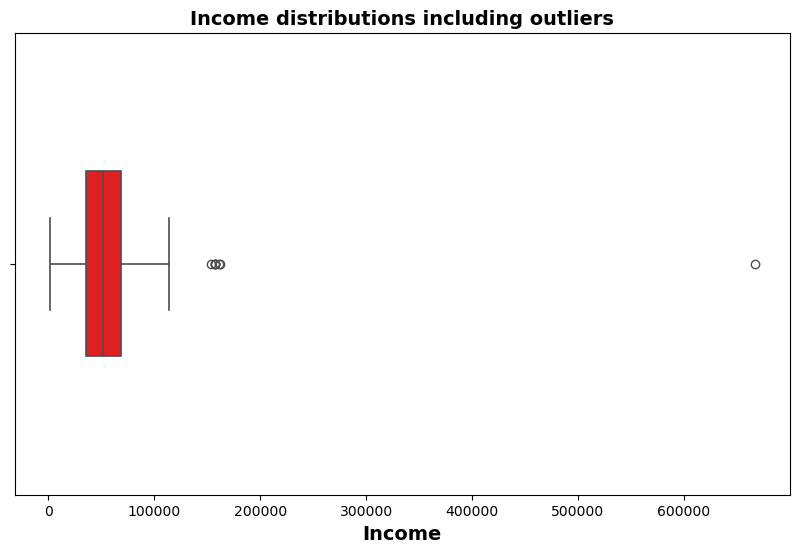

In [31]:
# Generate a box plot for the income column

# Load the library (matplotlib.pyplot)
import matplotlib.pyplot as plt

# Load the library (seaborn)
import seaborn as sns

# Make a figure with size (width = 10 inches, height = 6 inches)
plt.figure(figsize=(10,6))

# Make a boxplot of the income column
sns.boxplot(x = df["Income"], width = 0.4, color = "red", linewidth = 1.2)
    
# Put a title on the bar plot
plt.title("Income distributions including outliers", fontsize = 14,  loc = "center", weight = "bold")

# put label on the x-axis
plt.xlabel("Income", fontsize = 14, weight = "bold")

plt.show()

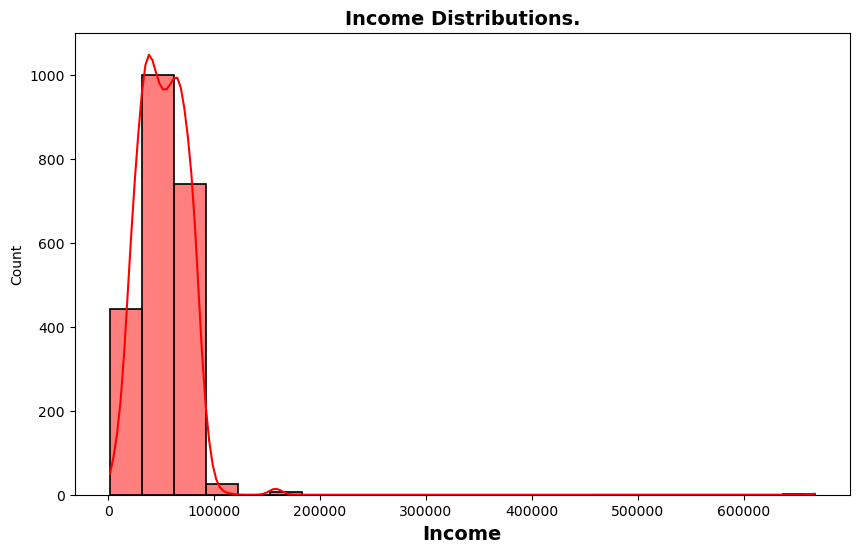

In [32]:
# Generate a histograms for the income column

# Make a figure with size (width = 10 inches, height = 6 inches)
plt.figure(figsize=(10,6))

# Make a histograms of the income column
sns.histplot(df["Income"], bins = 22, kde = True, color = "red", linewidth = 1.2)

# Put a title on the bar plot
plt.title("Income Distributions.", fontsize = 14,  loc = "center", weight = "bold")

# put label on the x-axis
plt.xlabel("Income", fontsize = 14, weight = "bold")

plt.show()

#### Apply ordinal and one-hot encoding based on the various types of categorical variables.

In [36]:
# Apply ordinal encoding for "Education" column

ordinal_encoding = [["Graduate", "PhD", "Master", "Undergraduate"]] 

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoding_cat = OrdinalEncoder(categories = ordinal_encoding)

df["Education_OrdinalEncoder"] = ordinal_encoding_cat.fit_transform(df[["Education"]])

print("dataset (df):\n", df)
                                                            

dataset (df):
          ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0      1826        1970  Graduate       Divorced  84835.0        0         0   
1         1        1961  Graduate         Single  57091.0        0         0   
2     10476        1958  Graduate        Married  67267.0        0         1   
3      1386        1967  Graduate        Married  32474.0        1         1   
4      5371        1989  Graduate         Single  21474.0        1         0   
...     ...         ...       ...            ...      ...      ...       ...   
2235  10142        1976       PhD       Divorced  66476.0        0         1   
2236   5263        1977    Master        Married  31056.0        1         0   
2237     22        1976  Graduate       Divorced  46310.0        1         0   
2238    528        1978  Graduate        Married  65819.0        0         0   
2239   4070        1969       PhD        Married  94871.0        0         2   

     Dt_Customer  Recenc

In [38]:
# check updated columns with "Marital_Status" and "Country" columns
print(df.head())         #  Not used  one-hot encoding

      ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduate       Divorced  84835.0        0         0   
1      1        1961  Graduate         Single  57091.0        0         0   
2  10476        1958  Graduate        Married  67267.0        0         1   
3   1386        1967  Graduate        Married  32474.0        1         1   
4   5371        1989  Graduate         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp1  AcceptedCmp2  Response  \
0     6/16/14        0       189  ...             0             0         1   
1     6/15/14        0       464  ...             0             1         1   
2     5/13/14        0       134  ...             0             0         0   
3     5/11/14        0        10  ...             0             0         0   
4      4/8/14        0         6  ...             0             0         1   

   Complain  Country  Age  total_children  Total_Spend  Total_

#### Illustrate the correlation between different pairs of variables.

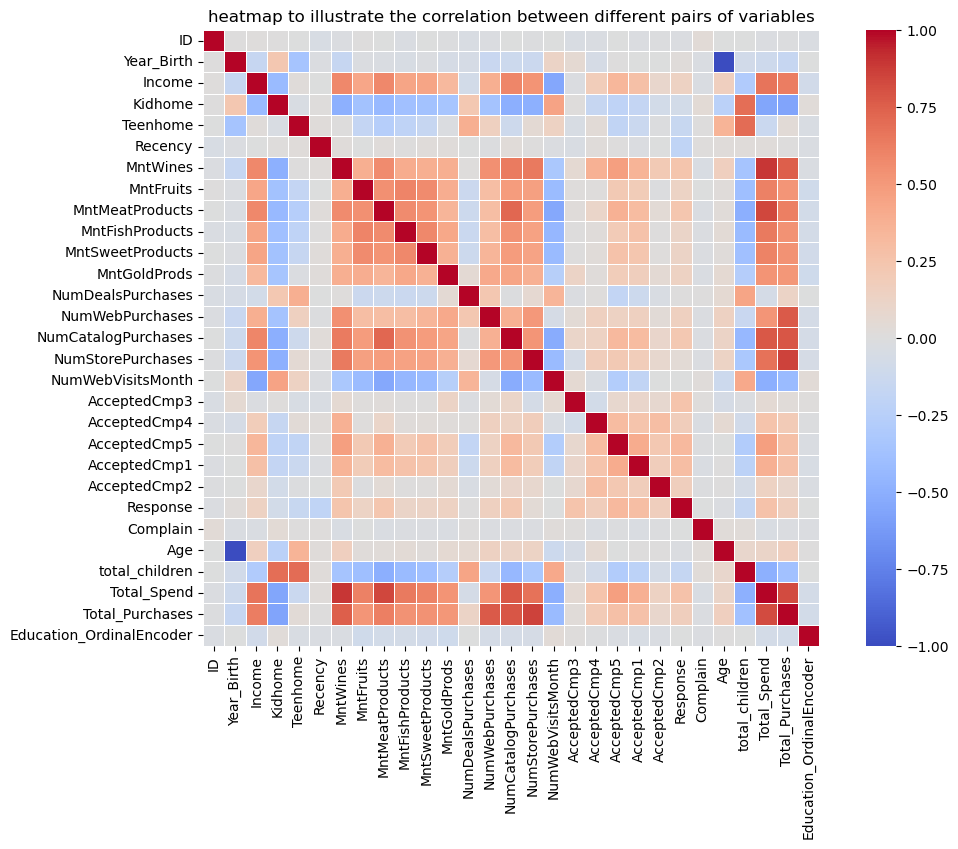

In [41]:
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(numeric_only = True), cmap = "coolwarm", center = 0, linewidths = 0.4, square = True)

plt.title("heatmap to illustrate the correlation between different pairs of variables")

plt.show()


### Test the following hypotheses:

In [44]:
# (a).	Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store 
#      shopping preferences.

In [46]:
# Compare shopping preferences between 2 groups

# load ttest_ind
from scipy.stats import ttest_ind

old_more_55 = df[df["Age"] > 55]["NumStorePurchases"]

old_less_equal_55 = df[df["Age"] <= 55]["NumStorePurchases"]

print("old_more_55 , old_less_equal_55:\n",  ttest_ind(old_more_55, old_less_equal_55, nan_policy = "omit"))

# Conclusion: difference between two groups (old_more_55 , and old_less_equal_55) is high. 


old_more_55 , old_less_equal_55:
 TtestResult(statistic=6.334764651957808, pvalue=2.864558561083144e-10, df=2238.0)


In [48]:
# (b). Customers with children likely experience time constraints, making online shopping a more convenient option.

In [50]:
# Find total number of children
df["customers_total_children"] = df["Kidhome"] + df["Teenhome"]

# With children
customers_with_children_tf =  df["customers_total_children"] > 0

customers_with_children = df[customers_with_children_tf]["NumWebPurchases"]

# Without children

customers_without_children_tf =  df["customers_total_children"] == 0

customers_without_children = df[customers_without_children_tf]["NumWebPurchases"]

print(" customers with and without children on web purchases:", ttest_ind(customers_with_children, customers_without_children, nan_policy = "omit"))


 customers with and without children on web purchases: TtestResult(statistic=-3.324463087423873, pvalue=0.0009001778860238199, df=2238.0)


In [52]:
# (c). Sales at physical stores may face the risk of cannibalization by alternative distribution channels.

In [54]:
# Sales at physical stores
Sales_physical_stores = df["NumStorePurchases"]

# Purchases cannibalization
cannibalization_purchases = df["NumWebPurchases"]+df["NumCatalogPurchases"]

print("diff_Sales_physical_stores_cannibalization:\n", ttest_ind(Sales_physical_stores, cannibalization_purchases, nan_policy = "omit"))


diff_Sales_physical_stores_cannibalization:
 TtestResult(statistic=-7.884334964023309, pvalue=3.942648895317914e-15, df=4478.0)


In [56]:
# (d).	Does the United States significantly outperform the rest of the world in total purchase volumes?

In [58]:

df["Total_Purchases"] = df[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases" ]].sum(axis = 1)

print("Total purchases:\n", df.head())

print("\n")

# US Total Purchase
US_Total_Purchase = df[df["Country"] == "US"]["Total_Purchases"]

# Non-US Total Purchase
non_US_Total_Purchase = df[df["Country"] != "US"]["Total_Purchases"]

print("\n")

print("US total purchase and non US purchase:\n", ttest_ind(US_Total_Purchase, non_US_Total_Purchase, nan_policy = "omit"))

Total purchases:
       ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduate       Divorced  84835.0        0         0   
1      1        1961  Graduate         Single  57091.0        0         0   
2  10476        1958  Graduate        Married  67267.0        0         1   
3   1386        1967  Graduate        Married  32474.0        1         1   
4   5371        1989  Graduate         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp2  Response  Complain  \
0     6/16/14        0       189  ...             0         1         0   
1     6/15/14        0       464  ...             1         1         0   
2     5/13/14        0       134  ...             0         0         0   
3     5/11/14        0        10  ...             0         0         0   
4      4/8/14        0         6  ...             0         1         0   

   Country  Age  total_children  Total_Spend  Total_Purchases  \
0  

### Use appropriate visualization to help analyze the following:

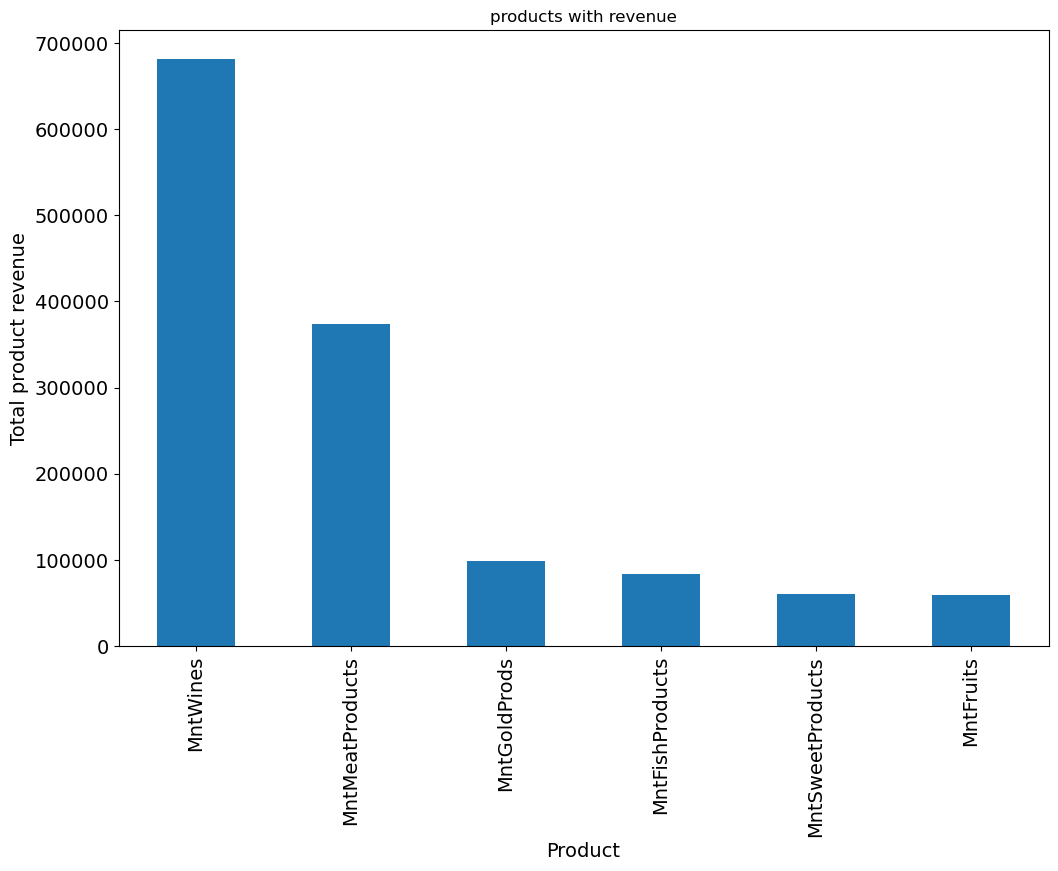

In [61]:
# (a). Find the top-performing products with revenue.

product_revenue_sum = df[["MntWines","MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum()

product_revenue_values = product_revenue_sum.sort_values(ascending = False)

product_revenue_values.plot(kind = "bar", figsize = (12, 8), title = "products with revenue",  fontsize = 14)

plt.xlabel("Product", fontsize = 14)

plt.ylabel("Total product revenue", fontsize = 14)


plt.show()

In [63]:
# (b).	Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.

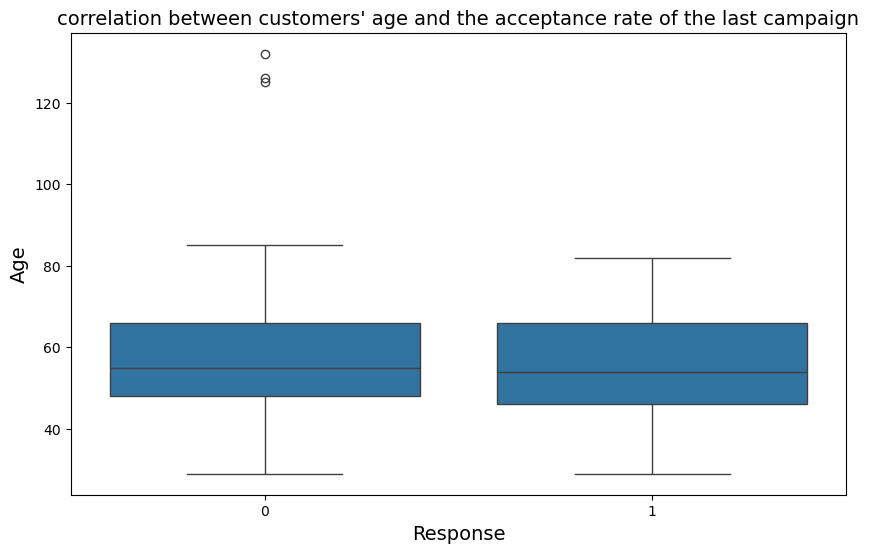

-0.02132521444197819

In [65]:

plt.figure(figsize=(10,6))

sns.boxplot(data = df, x = "Response", y = "Age")

plt.title("correlation between customers' age and the acceptance rate of the last campaign",  fontsize = 14)

plt.xlabel("Response", fontsize = 14)

plt.ylabel("Age", fontsize = 14)

plt.show()


# correlation check
df["Response"].corr(df["Age"])          # No clear relationship between "Response", and "Age

In [67]:
# (c).	Determine the country with the highest number of customers who accepted the last campaign.

Country
AUS    23
CA     38
GER    17
IND    13
ME      2
dtype: int64


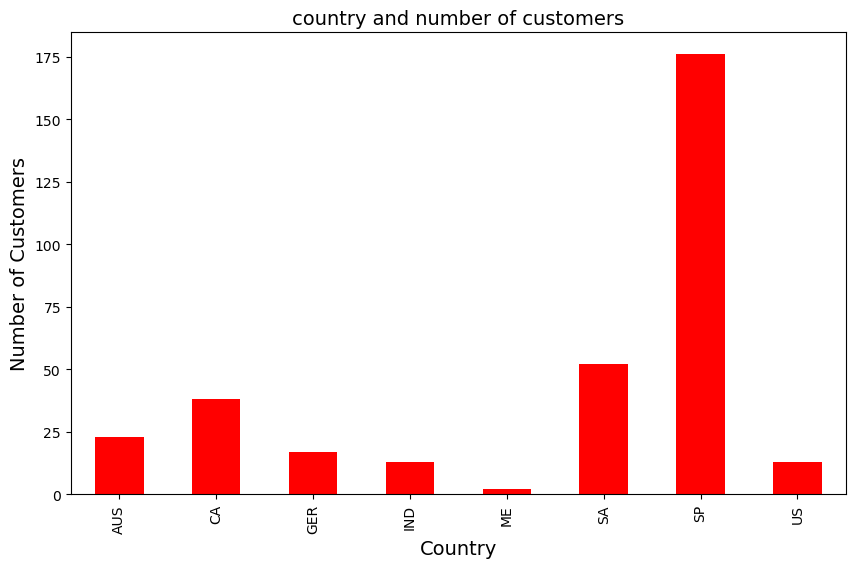

In [69]:
plt.figure(figsize=(10,6))

country_campaign_1 = df[df["Response"] == 1]

country_campaign_1_groupby = country_campaign_1.groupby("Country")

country_campaign_customers = country_campaign_1_groupby .size()

print(country_campaign_customers.head())

country_campaign_customers.plot(kind = "bar", color = "red", title = "Customers accepting last campaign by Country")

plt.title("country and number of customers", fontsize = 14)

plt.xlabel("Country", fontsize = 14)

plt.ylabel("Number of Customers", fontsize = 14)

plt.show()

In [71]:
# d.	Investigate if there is a discernible pattern in the number of children at home and the total expenditure.

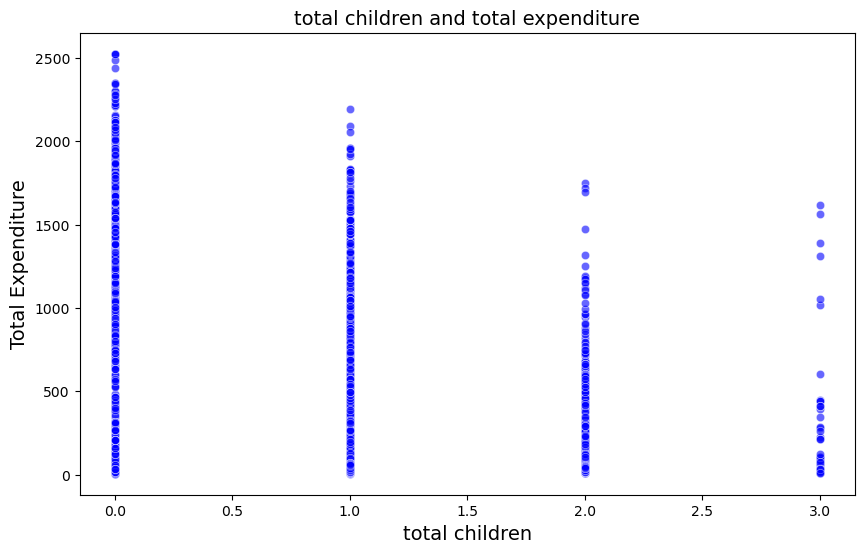

In [73]:
#  total children
df["customers_total_children"] = df["Kidhome"] + df["Teenhome"]

df["total_expenditure"] = df[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum(axis = 1)

plt.figure(figsize=(10,6))

sns.scatterplot(data = df, x = "customers_total_children", y = "total_expenditure", color = "blue", alpha = 0.6)

plt.title("total children and total expenditure", fontsize = 14)

plt.xlabel("total children", fontsize = 14)

plt.ylabel("Total Expenditure", fontsize = 14)

plt.show()

In [75]:
# (e) Analyze the educational background of customers who lodged complaints in the last two years.

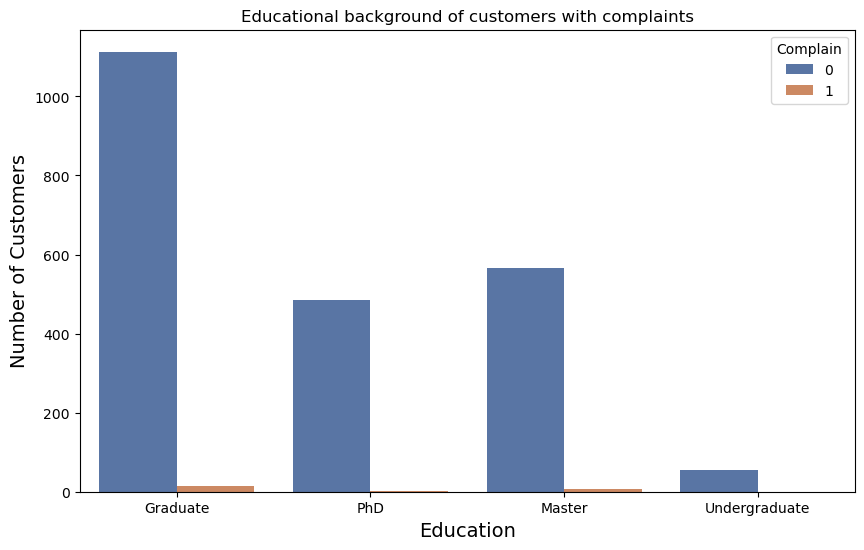

In [77]:
plt.figure(figsize=(10,6))

sns.countplot(data = df, x = "Education", hue = "Complain", palette = "deep")

plt.title("Educational background of customers with complaints")

plt.xlabel("Education", fontsize = 14)

plt.ylabel("Number of Customers", fontsize = 14)

plt.show()